<a href="https://colab.research.google.com/github/ekanrachma/ekanrachma/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sp
import statistics
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import cluster

# Import Dataset

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1wcUbLgrG8aMShr4zlEMgZ7AB5TLqa1QbVkmFwhKAGYs/edit#gid=1882234234'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
user_df = pd.read_csv(sheet_url_trf)
user_df

sheet_url = 'https://docs.google.com/spreadsheets/d/1IKnFDtLGGMAtkeg8pa1DaAkyAe-icD27hgmVS7cd6Xc/edit#gid=529570453'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
product_df = pd.read_csv(sheet_url_trf)
product_df

sheet_url = 'https://docs.google.com/spreadsheets/d/1BcJhsitwaGGUySz-o1Djn3G_F7F8TltnhXUFOdP1VJc/edit#gid=1695850762'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
tritem_df = pd.read_csv(sheet_url_trf)
tritem_df

sheet_url = 'https://docs.google.com/spreadsheets/d/11dMSKFaXOHcT6axPZzOQIx10Ba-xPkTx1E1a198RSjk/edit#gid=1467840422'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
payment_method_df = pd.read_csv(sheet_url_trf)
payment_method_df

sheet_url = 'https://docs.google.com/spreadsheets/d/1-LJkaDY25kTxa0n6EXPtjqwu524OJ3IyUQRTho1shFs/edit#gid=995209802'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
transaction_df = pd.read_csv(sheet_url_trf)
transaction_df

sheet_url = 'https://docs.google.com/spreadsheets/d/18jM1_5bN56pwEhp-_zym2mRs_HPd6E_3Rs7si4Bv_10/edit#gid=1476790425'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
event_df = pd.read_csv(sheet_url_trf)
event_df

sheet_url = 'https://docs.google.com/spreadsheets/d/1lQPUJx8kFGDWH9v7ZxE10MpK6PnFctep6A1ayXTdzf0/edit#gid=1863291927'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
merchant_df = pd.read_csv(sheet_url_trf)
merchant_df

,merchant_id,merchant_name,province,city,city_1
0,20013,Wayscape,Banten,Kota Tangerang,Kota Tangerang
1,20017,Ignition Point,Banten,Kota Tangerang,Kota Tangerang
2,20022,Hilltop,Banten,Kota Tangerang,Kota Tangerang
3,20023,Excel,Banten,Kota Tangerang,Kota Tangerang
4,20042,Harum,Banten,Kota Tangerang,Kota Tangerang
5,20004,Eco Shop,Banten,Tangerang Selatan,Tangerang Selatan
6,20005,Edenica,Banten,Tangerang Selatan,Tangerang Selatan
7,20001,Roadio,Jawa Barat,Bandung,Bandung
8,20018,Madzilla,Jawa Barat,Bandung,Bandung
9,20024,NextGen Incubator,Jawa Barat,Bandung,Bandung


In [ ]:
user_df.head()

,user_id,register_date,name,gender,province,city
0,10088,2019-11-09,Mustika Dabukke,male,Jawa Barat,Bandung
1,10089,2019-11-13,Luluh Prayoga,male,Jawa Barat,Bandung
2,10101,2019-01-26,Mulyono Napitupulu,male,Jawa Barat,Bandung
3,10129,2020-01-06,Gandewa Napitupulu,male,Jawa Barat,Bandung
4,10132,2019-04-10,Nrima Wahyudin,male,Jawa Barat,Bandung


# Cleaning Data

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        2002 non-null   int64 
 1   register_date  2002 non-null   object
 2   name           2002 non-null   object
 3   gender         2002 non-null   object
 4   province       2002 non-null   object
 5   city           2002 non-null   object
dtypes: int64(1), object(5)
memory usage: 94.0+ KB


In [ ]:
#change data columns into datetime

date_cols = ['register_date']

for i in date_cols :
  user_df[i] = pd.to_datetime(user_df[i])

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2002 non-null   int64         
 1   register_date  2002 non-null   datetime64[ns]
 2   name           2002 non-null   object        
 3   gender         2002 non-null   object        
 4   province       2002 non-null   object        
 5   city           2002 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 94.0+ KB


In [ ]:
transaction_df.head()

,event_id,event_name,timestamp_event,user_id,payment_method_id,transaction_id,voucher,original_amount,paid_amount,voucher_id,voucher_type
0,180538,complete,2020-05-08 12:48:05 UTC,10039,2,100244,False,2240000,2240000,NaN,NaN
1,281555,complete,2021-11-10 15:12:58 UTC,10105,3,100635,False,800000,800000,NaN,NaN
2,251820,complete,2021-05-21 08:24:17 UTC,10167,1,100994,False,800000,800000,NaN,NaN
3,105065,complete,2019-02-16 10:10:26 UTC,10180,1,101064,False,800000,800000,NaN,NaN
4,143069,complete,2019-10-19 10:56:53 UTC,10237,2,101397,False,800000,800000,NaN,NaN


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15543 entries, 0 to 15542
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   event_id           15543 non-null  int64  
 1   event_name         15543 non-null  object 
 2   timestamp_event    15543 non-null  object 
 3   user_id            15543 non-null  int64  
 4   payment_method_id  15543 non-null  int64  
 5   transaction_id     15543 non-null  int64  
 6   voucher            15543 non-null  bool   
 7   original_amount    15543 non-null  int64  
 8   paid_amount        15543 non-null  int64  
 9   voucher_id         8472 non-null   float64
 10  voucher_type       8472 non-null   float64
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 1.2+ MB


In [ ]:
#change data columns into datetime

date_cols = ['timestamp_event']

for i in date_cols :
  transaction_df[i] = pd.to_datetime(transaction_df[i])

transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15543 entries, 0 to 15542
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   event_id           15543 non-null  int64              
 1   event_name         15543 non-null  object             
 2   timestamp_event    15543 non-null  datetime64[ns, UTC]
 3   user_id            15543 non-null  int64              
 4   payment_method_id  15543 non-null  int64              
 5   transaction_id     15543 non-null  int64              
 6   voucher            15543 non-null  bool               
 7   original_amount    15543 non-null  int64              
 8   paid_amount        15543 non-null  int64              
 9   voucher_id         8472 non-null   float64            
 10  voucher_type       8472 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(6), object(1)
memory usage: 1.2+ MB


In [ ]:
transaction_df.head()

,event_id,event_name,timestamp_event,user_id,payment_method_id,transaction_id,voucher,original_amount,paid_amount,voucher_id,voucher_type
0,180538,complete,2020-05-08 12:48:05+00:00,10039,2,100244,False,2240000,2240000,NaN,NaN
1,281555,complete,2021-11-10 15:12:58+00:00,10105,3,100635,False,800000,800000,NaN,NaN
2,251820,complete,2021-05-21 08:24:17+00:00,10167,1,100994,False,800000,800000,NaN,NaN
3,105065,complete,2019-02-16 10:10:26+00:00,10180,1,101064,False,800000,800000,NaN,NaN
4,143069,complete,2019-10-19 10:56:53+00:00,10237,2,101397,False,800000,800000,NaN,NaN


In [ ]:
transaction_df['event_name'].value_counts()

complete     14225
cancelled     1318
Name: event_name, dtype: int64

In [ ]:
#removing cancelled orders

f_delivered = (transaction_df['event_name']=='complete')
transaction_df = transaction_df.loc[f_delivered]
transaction_df['event_name'].value_counts()
transaction_df

,event_id,event_name,timestamp_event,user_id,payment_method_id,transaction_id,voucher,original_amount,paid_amount,voucher_id,voucher_type
0,180538,complete,2020-05-08 12:48:05+00:00,10039,2,100244,False,2240000,2240000,NaN,NaN
1,281555,complete,2021-11-10 15:12:58+00:00,10105,3,100635,False,800000,800000,NaN,NaN
2,251820,complete,2021-05-21 08:24:17+00:00,10167,1,100994,False,800000,800000,NaN,NaN
3,105065,complete,2019-02-16 10:10:26+00:00,10180,1,101064,False,800000,800000,NaN,NaN
4,143069,complete,2019-10-19 10:56:53+00:00,10237,2,101397,False,800000,800000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15538,225100,complete,2020-12-07 15:32:51+00:00,11271,5,109695,True,2500000,2475000,3.0,3.0
15539,108980,complete,2019-03-22 06:16:47+00:00,11011,3,107038,True,1060000,1035000,3.0,3.0
15540,281900,complete,2021-11-12 16:56:28+00:00,11079,4,107619,True,1060000,1035000,3.0,3.0
15541,150437,complete,2019-11-23 16:18:48+00:00,20671,2,115193,True,2180000,2155000,3.0,3.0


In [ ]:
# Select only relevant column
transaction_cluster = transaction_df.copy()
relevant_column = ['transaction_id','user_id','timestamp_event','paid_amount']
transaction_cluster = transaction_cluster[(relevant_column)]
transaction_cluster.head()

,transaction_id,user_id,timestamp_event,paid_amount
0,100244,10039,2020-05-08 12:48:05+00:00,2240000
1,100635,10105,2021-11-10 15:12:58+00:00,800000
2,100994,10167,2021-05-21 08:24:17+00:00,800000
3,101064,10180,2019-02-16 10:10:26+00:00,800000
4,101397,10237,2019-10-19 10:56:53+00:00,800000


In [ ]:
transaction_df['event_name'].value_counts()

complete    14225
Name: event_name, dtype: int64

# Create RFM Score

In [ ]:
#R = Recency
#Days since the last purchase

max_date=transaction_cluster.groupby('user_id')['timestamp_event'].max().reset_index()
max_date=max_date.rename({'timestamp_event':'most_recent'},axis=1)
max_date.head()

,user_id,most_recent
0,10000,2021-11-21 09:35:48+00:00
1,10001,2021-10-29 15:46:19+00:00
2,10002,2021-10-04 13:39:04+00:00
3,10003,2021-05-15 22:32:40+00:00
4,10004,2021-12-04 09:22:03+00:00


In [ ]:
max_date['r_score']=(max_date['most_recent'].max()-max_date['most_recent']).dt.days
max_date.head()

,user_id,most_recent,r_score
0,10000,2021-11-21 09:35:48+00:00,39
1,10001,2021-10-29 15:46:19+00:00,62
2,10002,2021-10-04 13:39:04+00:00,87
3,10003,2021-05-15 22:32:40+00:00,229
4,10004,2021-12-04 09:22:03+00:00,26


In [ ]:
#F=Frequency
#how many times the customer makes transaction

n_transaction=transaction_cluster.groupby('user_id')['transaction_id'].count().reset_index()
n_transaction=n_transaction.rename({'transaction_id':'f_score'},axis=1)
n_transaction.head()

,user_id,f_score
0,10000,3
1,10001,4
2,10002,8
3,10003,4
4,10004,6


In [ ]:
n_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  1998 non-null   int64
 1   f_score  1998 non-null   int64
dtypes: int64(2)
memory usage: 31.3 KB


In [ ]:
n_transaction['user_id'] = n_transaction['user_id'].astype(int)
n_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  1998 non-null   int64
 1   f_score  1998 non-null   int64
dtypes: int64(2)
memory usage: 31.3 KB


In [ ]:
#M=Monetary
#Average Purchase Value from the customers 

avg_purchase=transaction_cluster.groupby('user_id')['paid_amount'].sum().reset_index()
avg_purchase=avg_purchase.rename({'paid_amount':'m_score'},axis=1)
avg_purchase.head()

,user_id,m_score
0,10000,4445000
1,10001,4390000
2,10002,9040000
3,10003,6250000
4,10004,6265000


In [ ]:
avg_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  1998 non-null   int64
 1   m_score  1998 non-null   int64
dtypes: int64(2)
memory usage: 31.3 KB


In [ ]:
avg_purchase['user_id'] = avg_purchase['user_id'].astype(str)
avg_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  1998 non-null   object
 1   m_score  1998 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.3+ KB


In [ ]:
avg_purchase['user_id'].nunique()

1998

There is 1998 unique customers

## Merge Dataset RFM

In [ ]:
merge=max_date.merge(n_transaction, how='left', on = 'user_id')
merge=merge.merge(avg_purchase, how='left', on='user_id')
merge

,user_id,most_recent,r_score,f_score,m_score
0,10000,2021-11-21 09:35:48+00:00,39,3,4445000
1,10001,2021-10-29 15:46:19+00:00,62,4,4390000
2,10002,2021-10-04 13:39:04+00:00,87,8,9040000
3,10003,2021-05-15 22:32:40+00:00,229,4,6250000
4,10004,2021-12-04 09:22:03+00:00,26,6,6265000
...,...,...,...,...,...
1993,20696,2021-11-26 12:17:29+00:00,34,9,8310000
1994,20697,2021-03-15 16:44:59+00:00,290,9,11545000
1995,20698,2021-10-12 08:31:04+00:00,79,10,15340000
1996,20699,2021-03-05 09:33:21+00:00,300,4,4315000


In [ ]:
df_rfm=merge[['user_id','r_score','f_score','m_score']]
df_rfm

,user_id,r_score,f_score,m_score
0,10000,39,3,4445000
1,10001,62,4,4390000
2,10002,87,8,9040000
3,10003,229,4,6250000
4,10004,26,6,6265000
...,...,...,...,...
1993,20696,34,9,8310000
1994,20697,290,9,11545000
1995,20698,79,10,15340000
1996,20699,300,4,4315000


# Cluster Analysis

## Standardization

In [ ]:
features=df_rfm.drop('user_id',axis=1)
scale=StandardScaler()
features_scaled=scale.fit_transform(features)
features_scaled

array([[-0.6614261 , -1.27039152, -0.18360516],
       [-0.49973158, -0.96201559, -0.19702433],
       [-0.32397666,  0.27148812,  0.93750504],
       ...,
       [-0.38021823,  0.88823997,  2.47460934],
       [ 1.17345525, -0.96201559, -0.21532319],
       [-0.78796964,  1.81336775,  2.62246413]])

In [ ]:
numerical_col = ['r_score','f_score','m_score']
numerical_col

['r_score', 'f_score', 'm_score']

In [ ]:
df_scale = df_rfm.copy()
scaler = MinMaxScaler()
df_scale[numerical_col] = scaler.fit_transform(df_scale[numerical_col])
df_scale

,user_id,r_score,f_score,m_score
0,10000,0.039959,0.105263,0.167701
1,10001,0.063525,0.157895,0.165619
2,10002,0.089139,0.368421,0.341649
3,10003,0.234631,0.157895,0.236031
4,10004,0.026639,0.263158,0.236599
...,...,...,...,...
1993,20696,0.034836,0.421053,0.314014
1994,20697,0.297131,0.421053,0.436478
1995,20698,0.080943,0.473684,0.580141
1996,20699,0.307377,0.157895,0.162780


## K-Means Clustering

In [ ]:
### Drop the column that are not needed
df_check = df_scale.copy()
df_check = df_scale.drop(['user_id'],axis=1)
df_check.head()

,r_score,f_score,m_score
0,0.039959,0.105263,0.167701
1,0.063525,0.157895,0.165619
2,0.089139,0.368421,0.341649
3,0.234631,0.157895,0.236031
4,0.026639,0.263158,0.236599


### Elbow Method

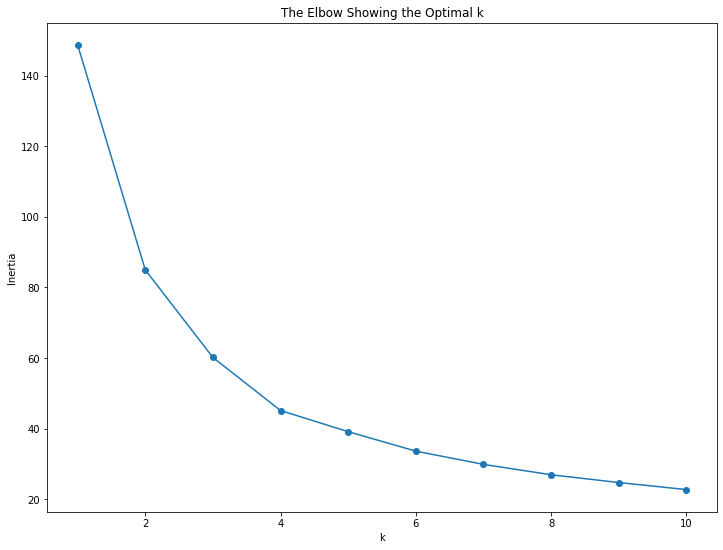

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
  kmeans.fit(df_check)
  wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Showing the Optimal k')
plt.show()


> By using elbow method, we can see the optimal number of clusters from the graph where the elbow bends that is 4.



### Silhouette Analysis

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3940085039249775
For n_clusters = 3 The average silhouette_score is : 0.38248602240304486
For n_clusters = 4 The average silhouette_score is : 0.3534614840142682
For n_clusters = 5 The average silhouette_score is : 0.3387328272254515
For n_clusters = 6 The average silhouette_score is : 0.3057686125230454
For n_clusters = 7 The average silhouette_score is : 0.303747063705293
For n_clusters = 8 The average silhouette_score is : 0.280287464083672
For n_clusters = 9 The average silhouette_score is : 0.28156479300194825
For n_clusters = 10 The average silhouette_score is : 0.28911763865454543


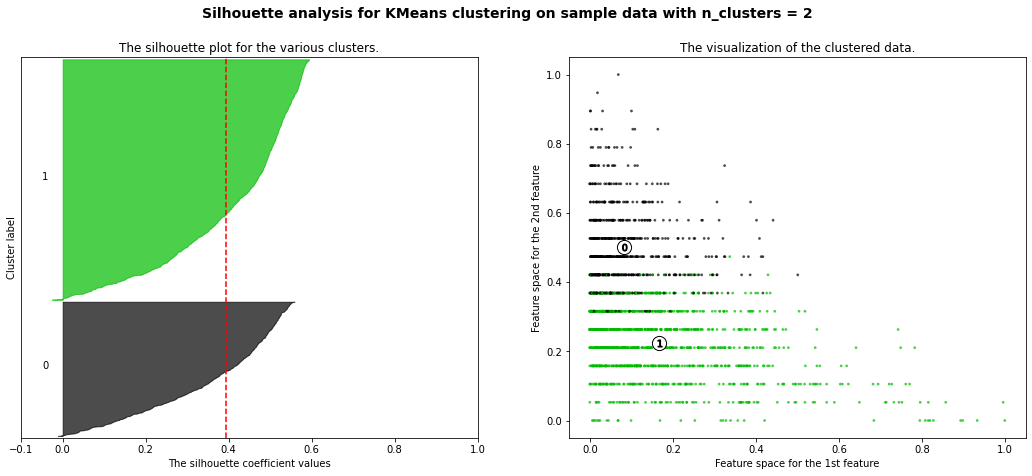

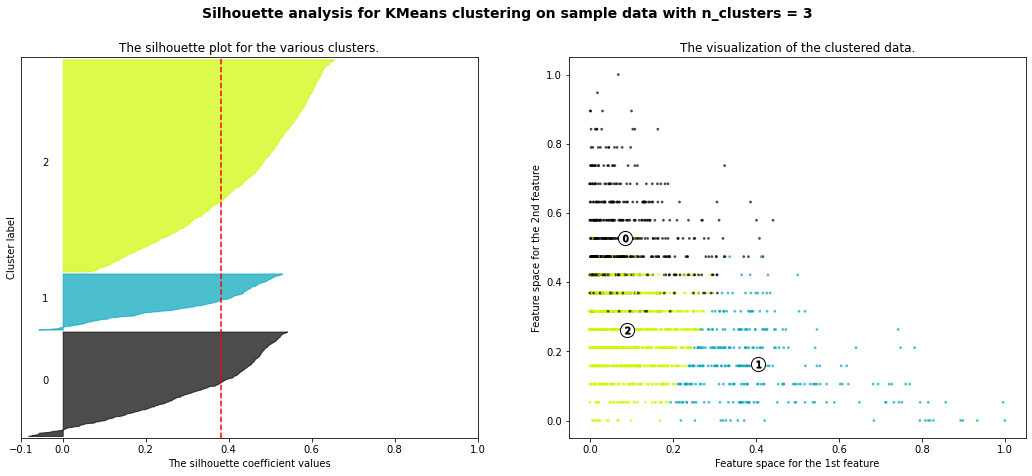

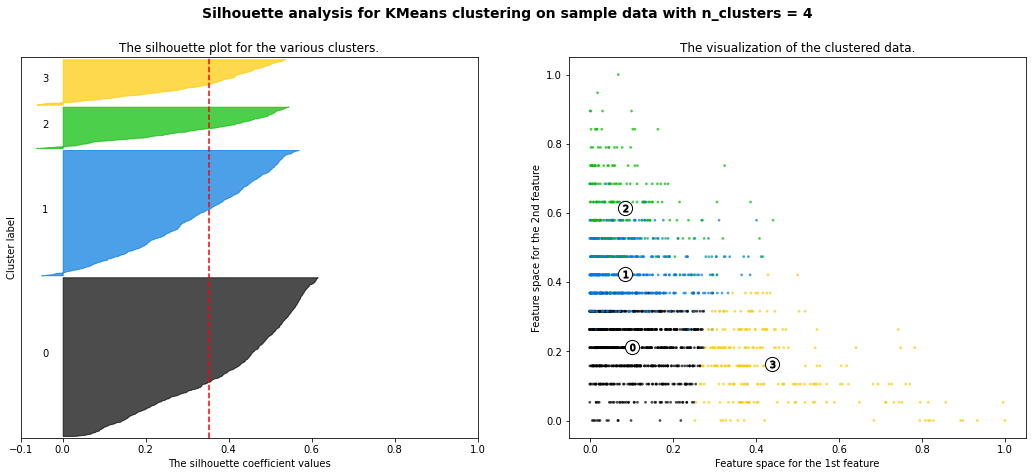

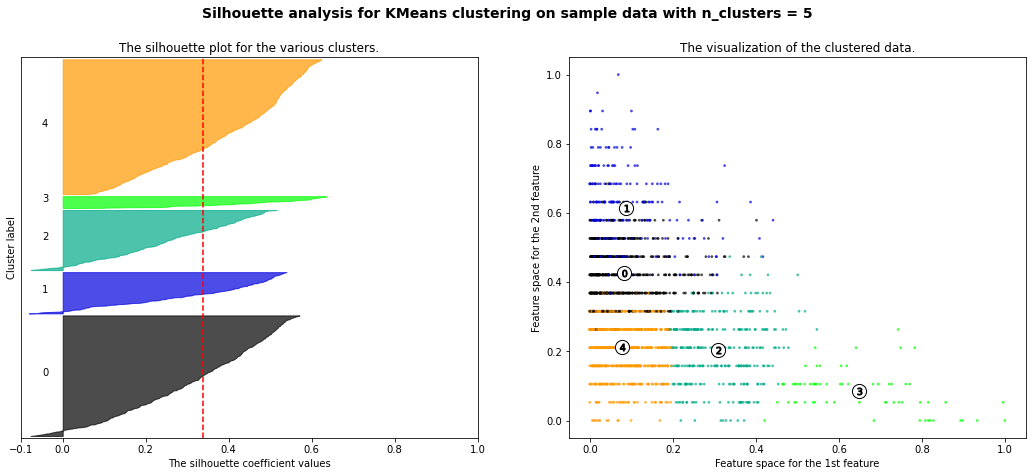

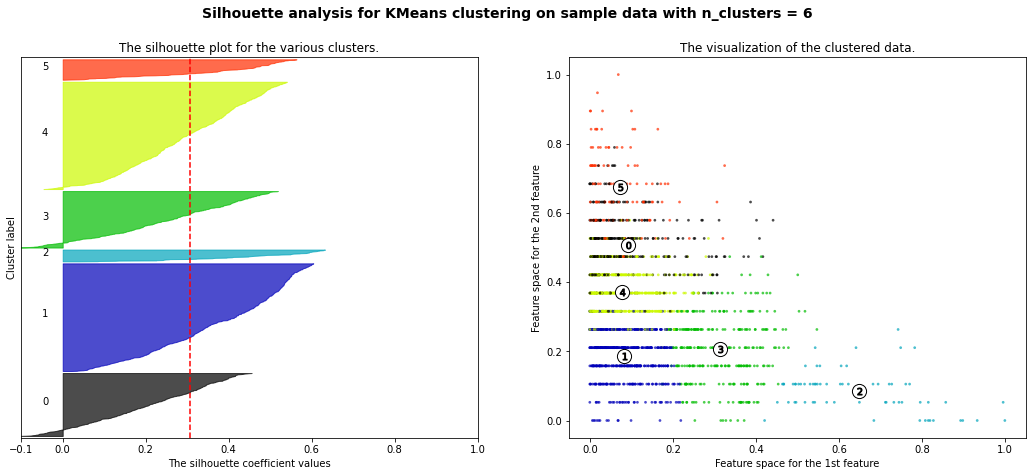

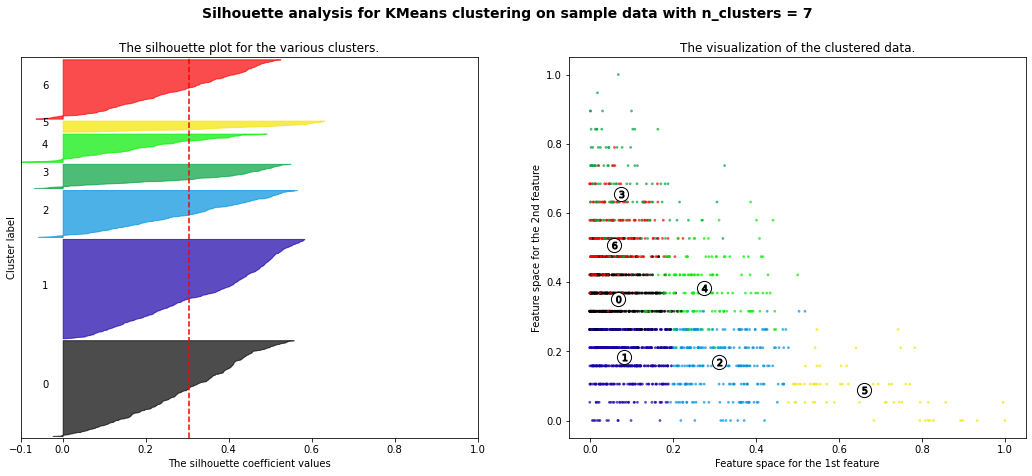

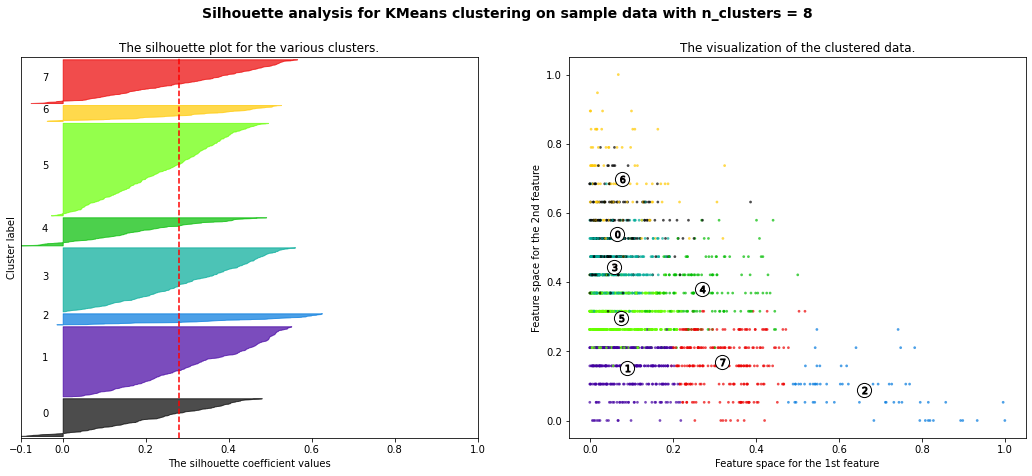

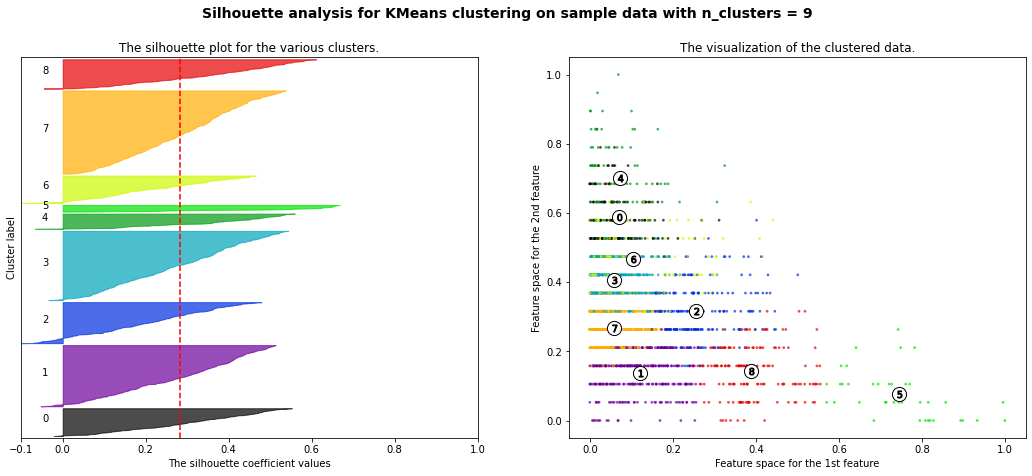

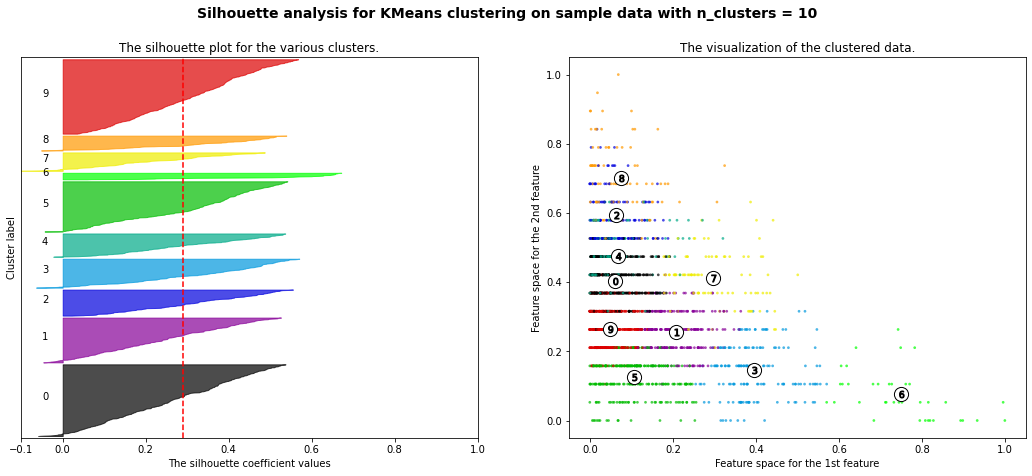

In [ ]:
silhoutte_analysis(df_check,list(range(2,11)))

Fit the number of clusters into dataset

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=1)
kmeans.fit(df_check)
df_seg_kmeans=df_rfm.copy()
df_seg_kmeans['segments']=kmeans.labels_
df_seg_kmeans.head()

,user_id,r_score,f_score,m_score,segments
0,10000,39,3,4445000,1
1,10001,62,4,4390000,1
2,10002,87,8,9040000,3
3,10003,229,4,6250000,1
4,10004,26,6,6265000,1


In [ ]:
### Drop the column that are not needed
df_cluster = df_seg_kmeans.copy()
df_cluster = df_seg_kmeans.drop(['user_id'],axis=1)
df_cluster.head()

,r_score,f_score,m_score,segments
0,39,3,4445000,1
1,62,4,4390000,1
2,87,8,9040000,3
3,229,4,6250000,1
4,26,6,6265000,1


Let's see how the clusters scattered

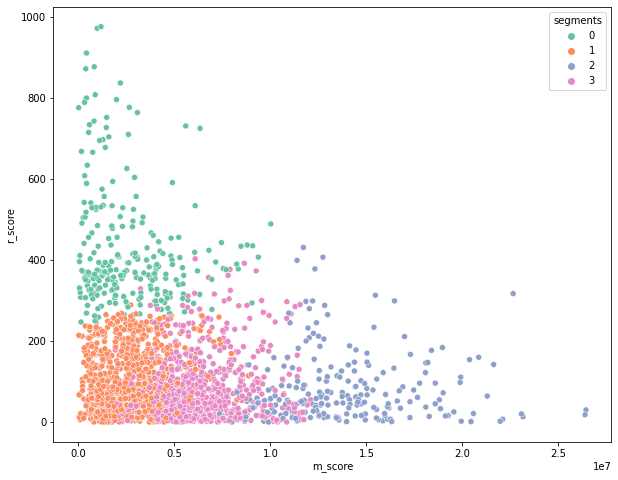

In [ ]:
x_axis=df_cluster['m_score']
y_axis=df_cluster['r_score']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=df_cluster['segments'],palette='Set2',legend='full')
plt.show()

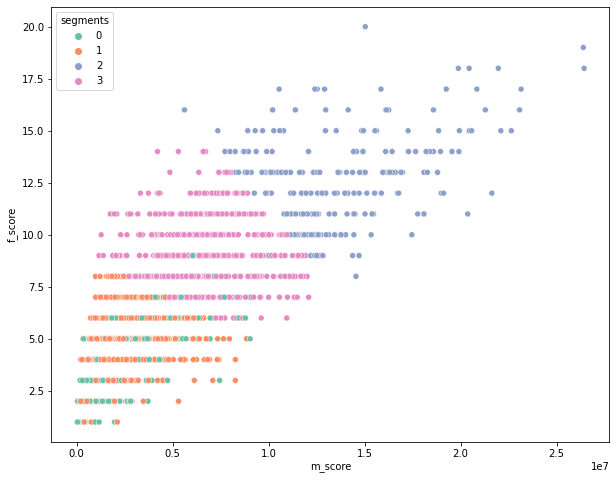

In [ ]:
x_axis=df_cluster['m_score']
y_axis=df_cluster['f_score']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_cluster['segments'],palette='Set2',legend='full')
plt.show()

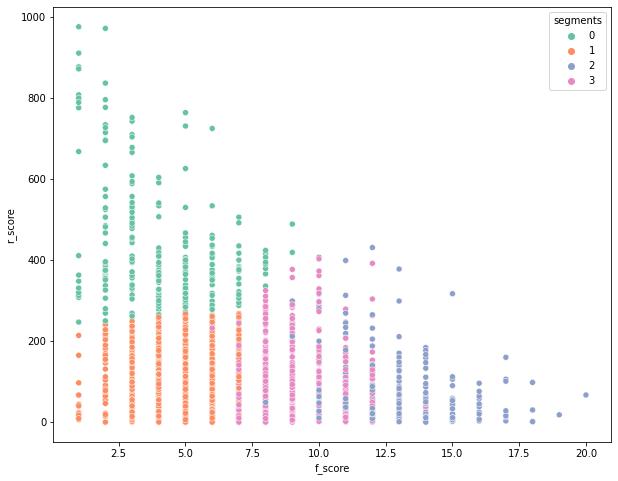

In [ ]:
x_axis=df_cluster['f_score']
y_axis=df_cluster['r_score']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_cluster['segments'],palette='Set2',legend='full')
plt.show()

### Final Cluster

In [ ]:
cluster_end = df_rfm.copy()
cluster_model = cluster.KMeans(n_clusters=4, random_state = 2)
cluster_model.fit(df_seg_kmeans)
cluster_label = cluster_model.labels_
cluster_end['cluster'] = cluster_label
cluster_end

,user_id,r_score,f_score,m_score,cluster
0,10000,39,3,4445000,2
1,10001,62,4,4390000,2
2,10002,87,8,9040000,1
3,10003,229,4,6250000,2
4,10004,26,6,6265000,2
...,...,...,...,...,...
1993,20696,34,9,8310000,1
1994,20697,290,9,11545000,1
1995,20698,79,10,15340000,3
1996,20699,300,4,4315000,2


## Exploratory Data Analysis (EDA)

In [ ]:
cluster_end.groupby('cluster')['r_score','f_score','m_score'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


r_score                             f_score                            \
          count        mean median  max min   count       mean median max min   
cluster                                                                         
0           840  168.875000  109.5  976   0     840   4.777381    5.0  12   1   
1           311  102.787781   62.0  489   0     311  10.038585   10.0  17   3   
2           738  113.811653   77.0  731   0     738   7.657182    8.0  16   2   
3           109   74.183486   55.0  317   1     109  13.201835   13.0  20   8   

        m_score                                                
          count          mean      median       max       min  
cluster                                                        
0           840  1.900244e+06   1940000.0   3595000     15000  
1           311  9.844091e+06   9580000.0  13155000   7575000  
2           738  5.298686e+06   5175000.0   7550000   3605000  
3           109  1.666524e+07  15871000.0  26431000  13430400

#### Cluster Naming

* **Cluster 3**: Dengan recency paling kecil (median = 55, masih di kisaran 2 bulan), dan frekuensi pembelian tertinggi (median=13) dan revenue yang paling besar (median = 15,8 juta) ==> 5,45% populasi
* **Cluster 1**: Dengan recency kedua terendah (median = 62, masih di kisaran 2 bulan), dan frekuensi pembelian kedua tertinggi (median = 10), revenue terbesar kedua (median = 9,6 juta) ==> Loyal ==> 15,57% populasi
* **Cluster 2**: Dengen recency ketiga terendah (median = 77), frekuensi pembelian ketingga tertinggi (median= 8; < 10), dan revenue terbesar ketiga (median = 5,2 juta) ==> Promising ==> 36,94% populasi
* **Cluster 0**: Dengen recency tertinggi (median = 109.5, diatas > 3 bulan), frekuensi pembelian terendah (median = 5) dan revenue terendah (median =1,9 juta; < 2 juta) ==> Rookies ==> 42,04% populasi

#### Target Upselling for each Cluster

* Core customer: Pertahankan frekuensi dan revenue dari customer di grup ini
* Loyal customer: Up customer di segmen ini ke Core customer
* Promising: Persentasi terhadap populasi besar dibandingkan dengan Core & Loyal customer, mempertahankan frekuensi sekaligus recency dari customer ini untuk meningkatkan GMV
* Rookies: Mengusahakan agar customer di cluster ini tidak reten, menarik kembali customer di cluster ini untuk bertransaksi (dicek juga nanti lifetime nya)

### AOV and ABS by Customer Segment

In [ ]:
# Create AOV per user_id
user_AOV = cluster_end.copy()
user_AOV['AOV'] = user_AOV['m_score']/user_AOV['f_score']
user_AOV.head()

,user_id,r_score,f_score,m_score,cluster,AOV
0,10000,39,3,4445000,2,1.481667e+06
1,10001,62,4,4390000,2,1.097500e+06
2,10002,87,8,9040000,1,1.130000e+06
3,10003,229,4,6250000,2,1.562500e+06
4,10004,26,6,6265000,2,1.044167e+06


In [ ]:
# ABS per user_id
tritem_df.head()

,transaction_item_id,transaction_id,event_id,user_id,event_name,timestamp_event,payment_method_id,product_id,qty,price,original_amount
0,1000191,100019,250933,10003,complete,2021-05-15 22:32:40.000000 UTC,4,10000,8,100000,800000
1,1002601,100260,161076,10041,complete,2020-01-15 17:17:58.000000 UTC,2,10000,8,100000,800000
2,1008021,100802,117276,10136,complete,2019-05-15 13:45:08.000000 UTC,2,10000,8,100000,800000
3,1019601,101960,223154,10326,complete,2020-11-30 07:27:28.000000 UTC,3,10000,8,100000,800000
4,1037631,103763,217942,10620,cancelled,2020-11-09 13:39:20.000000 UTC,2,10000,8,100000,800000


In [ ]:
# Find total qty per user
user_qty = tritem_df.groupby('user_id')['qty'].sum().reset_index()
user_qty = user_qty.rename({'qty':'total_qty'},axis=1)
user_qty.head()

,user_id,total_qty
0,10000,61
1,10001,44
2,10002,111
3,10003,59
4,10004,79


In [ ]:
# Merge to user_AOV dataframe to find ABS per customer
user_AOV_ABS = user_AOV.merge(user_qty, how='left', on='user_id')
user_AOV_ABS['ABS'] = user_AOV_ABS['total_qty']/user_AOV_ABS['f_score']
user_AOV_ABS = user_AOV_ABS.rename({'r_score':'recency','f_score':'total_order','m_score':'revenue'},axis=1)
user_AOV_ABS.head()

,user_id,recency,total_order,revenue,cluster,AOV,total_qty,ABS
0,10000,39,3,4445000,2,1.481667e+06,61,20.333333
1,10001,62,4,4390000,2,1.097500e+06,44,11.000000
2,10002,87,8,9040000,1,1.130000e+06,111,13.875000
3,10003,229,4,6250000,2,1.562500e+06,59,14.750000
4,10004,26,6,6265000,2,1.044167e+06,79,13.166667


In [ ]:
user_AOV_ABS.groupby('cluster')['AOV','ABS'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


AOV                                                            ABS  \
        count          mean        median           max            min count   
cluster                                                                        
0         840  4.263116e+05  3.959821e+05  2.125000e+06   15000.000000   840   
1         311  1.036677e+06  1.017167e+06  2.755000e+06  551785.714286   311   
2         738  7.459906e+05  6.712500e+05  2.655000e+06  301071.428571   738   
3         109  1.281766e+06  1.277385e+06  1.851636e+06  751750.000000   109   

                                             
             mean    median        max  min  
cluster                                      
0        4.831358  4.333333  24.000000  1.0  
1        3.423871  1.400000  19.777778  1.0  
2        3.934386  1.571429  25.333333  1.0  
3        1.394274  1.200000  13.714286  1.0

### Demographic per Segment

In [ ]:
# Create df_segment for reference table
df_segment = user_AOV_ABS[['user_id','cluster']]
df_segment

,user_id,cluster
0,10000,2
1,10001,2
2,10002,1
3,10003,2
4,10004,2
...,...,...
1993,20696,1
1994,20697,1
1995,20698,3
1996,20699,2


In [ ]:
# merge df_segment to user_df
segment_demo = df_segment.merge(user_df, how = 'left', on='user_id')
segment_demo.head()

,user_id,cluster,register_date,name,gender,province,city
0,10000,2,2019-08-02,Warta Pradipta,male,DKI Jakarta,Jakarta Utara
1,10001,2,2020-07-09,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya
2,10002,1,2019-04-19,Balidin Sitorus,male,DKI Jakarta,Jakarta Selatan
3,10003,2,2019-02-02,Cemani Narpati,male,Banten,Tangerang Selatan
4,10004,2,2019-08-22,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang


In [ ]:
segment_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        1998 non-null   int64         
 1   cluster        1998 non-null   int32         
 2   register_date  1998 non-null   datetime64[ns]
 3   name           1998 non-null   object        
 4   gender         1998 non-null   object        
 5   province       1998 non-null   object        
 6   city           1998 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 117.1+ KB


In [ ]:
# Add customer lifetime column
# max_date['r_score']=(max_date['most_recent'].max()-max_date['most_recent']).dt.days
# max_date.head()
segment_demo['customer_lifetime'] = (pd.to_datetime('now')-segment_demo['register_date']).dt.days
segment_demo.head()

,user_id,cluster,register_date,name,gender,province,city,customer_lifetime
0,10000,2,2019-08-02,Warta Pradipta,male,DKI Jakarta,Jakarta Utara,1185
1,10001,2,2020-07-09,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,843
2,10002,1,2019-04-19,Balidin Sitorus,male,DKI Jakarta,Jakarta Selatan,1290
3,10003,2,2019-02-02,Cemani Narpati,male,Banten,Tangerang Selatan,1366
4,10004,2,2019-08-22,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang,1165


#### Customer Lifetime by Segmentation

In [ ]:
segment_demo.groupby('cluster')['customer_lifetime'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,840,1143.241667,1191.0,1398,324
1,311,1278.926045,1297.0,1398,726
2,738,1237.655827,1271.0,1398,641
3,109,1307.981651,1321.0,1398,847


#### Gender by Segmentation

In [ ]:
gender_segment = segment_demo.copy()

In [ ]:
dum_gender = pd.get_dummies(gender_segment, columns=["gender"], prefix=["gender"])
gender_segment = gender_segment.merge(dum_gender)

In [ ]:
gender_segment.head()

,user_id,cluster,register_date,name,gender,province,city,customer_lifetime,gender_female,gender_male
0,10000,2,2019-08-02,Warta Pradipta,male,DKI Jakarta,Jakarta Utara,1185,0,1
1,10001,2,2020-07-09,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,843,0,1
2,10002,1,2019-04-19,Balidin Sitorus,male,DKI Jakarta,Jakarta Selatan,1290,0,1
3,10003,2,2019-02-02,Cemani Narpati,male,Banten,Tangerang Selatan,1366,0,1
4,10004,2,2019-08-22,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang,1165,0,1


In [ ]:
df_gender = gender_segment.groupby('cluster')[['gender_female','gender_male']].sum()
df_gender = pd.DataFrame(df_gender)
df_gender['male_percentage'] = round(df_gender['gender_male']/(df_gender['gender_male']+df_gender['gender_female'])*100,2)
df_gender['female_percentage'] = round(df_gender['gender_female']/(df_gender['gender_male']+df_gender['gender_female'])*100,2)

In [ ]:
df_gender

,gender_female,gender_male,male_percentage,female_percentage
cluster,,,,
0,342.0,498.0,59.29,40.71
1,86.0,225.0,72.35,27.65
2,236.0,502.0,68.02,31.98
3,36.0,73.0,66.97,33.03


### Province by Segmentation

In [ ]:
province_segment = segment_demo.copy()

In [ ]:
dum_province = pd.get_dummies(province_segment, columns=["province"], prefix=["prov"])
province_segment = province_segment.merge(dum_province)

In [ ]:
province_segment.head()

,user_id,cluster,register_date,name,gender,province,city,customer_lifetime,prov_Banten,prov_DKI Jakarta,prov_Jawa Barat,prov_Jawa Tengah,prov_Jawa Timur
0,10000,2,2019-08-02,Warta Pradipta,male,DKI Jakarta,Jakarta Utara,1185,0,1,0,0,0
1,10001,2,2020-07-09,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya,843,0,0,0,0,1
2,10002,1,2019-04-19,Balidin Sitorus,male,DKI Jakarta,Jakarta Selatan,1290,0,1,0,0,0
3,10003,2,2019-02-02,Cemani Narpati,male,Banten,Tangerang Selatan,1366,1,0,0,0,0
4,10004,2,2019-08-22,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang,1165,0,0,0,1,0


In [ ]:
df_prov = province_segment.groupby('cluster')[['prov_Banten','prov_DKI Jakarta','prov_Jawa Barat','prov_Jawa Tengah','prov_Jawa Timur']].sum()
df_prov = pd.DataFrame(df_prov)

In [ ]:
df_prov.head()

,prov_Banten,prov_DKI Jakarta,prov_Jawa Barat,prov_Jawa Tengah,prov_Jawa Timur
cluster,,,,,
0,114.0,377.0,189.0,50.0,110.0
1,44.0,132.0,78.0,21.0,36.0
2,95.0,308.0,179.0,59.0,97.0
3,17.0,43.0,29.0,4.0,16.0


### Payment Type by Segmentation

In [ ]:
transaction_df.head()

,event_id,event_name,timestamp_event,user_id,payment_method_id,transaction_id,voucher,original_amount,paid_amount,voucher_id,voucher_type
0,180538,complete,2020-05-08 12:48:05+00:00,10039,2,100244,False,2240000,2240000,NaN,NaN
1,281555,complete,2021-11-10 15:12:58+00:00,10105,3,100635,False,800000,800000,NaN,NaN
2,251820,complete,2021-05-21 08:24:17+00:00,10167,1,100994,False,800000,800000,NaN,NaN
3,105065,complete,2019-02-16 10:10:26+00:00,10180,1,101064,False,800000,800000,NaN,NaN
4,143069,complete,2019-10-19 10:56:53+00:00,10237,2,101397,False,800000,800000,NaN,NaN


In [ ]:
# merge transaction_df with df_segment
segment_trans = df_segment.merge(transaction_df, how = 'left', on='user_id')
segment_trans.head()

,user_id,cluster,event_id,event_name,timestamp_event,payment_method_id,transaction_id,voucher,original_amount,paid_amount,voucher_id,voucher_type
0,10000,2,146761,complete,2019-11-06 14:07:08+00:00,2,100001,True,920000,895000,2.0,2.0
1,10000,2,283582,complete,2021-11-21 09:35:48+00:00,1,100002,True,3240000,3215000,2.0,2.0
2,10000,2,130551,complete,2019-08-03 10:34:24+00:00,2,100000,True,360000,335000,3.0,3.0
3,10001,2,279498,complete,2021-10-29 15:46:19+00:00,3,100007,False,1510000,1510000,NaN,NaN
4,10001,2,214870,complete,2020-10-27 10:35:43+00:00,2,100005,True,630000,605000,2.0,2.0


In [ ]:
payment_segment = segment_trans[['user_id','cluster','payment_method_id','voucher']]
payment_segment

,user_id,cluster,payment_method_id,voucher
0,10000,2,2,True
1,10000,2,1,True
2,10000,2,2,True
3,10001,2,3,False
4,10001,2,2,True
...,...,...,...,...
14220,20700,3,4,False
14221,20700,3,2,True
14222,20700,3,2,True
14223,20700,3,4,True


In [ ]:
dum_payment = pd.get_dummies(payment_segment, columns=["payment_method_id"], prefix=["payment"])
payment_segment = payment_segment.merge(dum_payment)

In [ ]:
payment_segment.head()

,user_id,cluster,payment_method_id,voucher,payment_1,payment_2,payment_3,payment_4,payment_5
0,10000,2,2,True,0,1,0,0,0
1,10000,2,2,True,1,0,0,0,0
2,10000,2,2,True,0,1,0,0,0
3,10000,2,1,True,0,1,0,0,0
4,10000,2,1,True,1,0,0,0,0


In [ ]:
df_payment = payment_segment.groupby('cluster')[['payment_1','payment_2','payment_3','payment_4','payment_5']].sum()
df_payment = pd.DataFrame(df_payment)

In [ ]:
df_payment

,payment_1,payment_2,payment_3,payment_4,payment_5
cluster,,,,,
0,4052.0,5866.0,2806.0,1421.0,260.0
1,3008.0,7585.0,3678.0,5079.0,766.0
2,6013.0,10536.0,5266.0,4840.0,1012.0
3,542.0,4911.0,2262.0,4594.0,418.0


### Voucher Usage by Segmentation

In [ ]:
### Find total voucher usage per user_id
voucher_segment = segment_trans[['user_id','cluster','voucher']]
voucher_segment

,user_id,cluster,voucher
0,10000,2,True
1,10000,2,True
2,10000,2,True
3,10001,2,False
4,10001,2,True
...,...,...,...
14220,20700,3,False
14221,20700,3,True
14222,20700,3,True
14223,20700,3,True


In [ ]:
dum_voucher = pd.get_dummies(voucher_segment, columns=["voucher"], prefix=["voucher"])
voucher_segment = voucher_segment.merge(dum_voucher)

In [ ]:
voucher_segment

,user_id,cluster,voucher,voucher_False,voucher_True
0,10000,2,True,0,1
1,10000,2,True,0,1
2,10000,2,True,0,1
3,10000,2,True,0,1
4,10000,2,True,0,1
...,...,...,...,...,...
122282,20700,3,True,1,0
122283,20700,3,True,0,1
122284,20700,3,True,0,1
122285,20700,3,True,0,1


In [ ]:
### Create dataframe for total voucher_usage
total_voucher = voucher_segment.copy()
total_voucher = total_voucher.groupby('user_id')['voucher_True'].sum()
total_voucher = pd.DataFrame(total_voucher)
total_voucher.reset_index(inplace=True)
total_voucher

,user_id,voucher_True
0,10000,9.0
1,10001,12.0
2,10002,40.0
3,10003,12.0
4,10004,30.0
...,...,...
1993,20696,45.0
1994,20697,9.0
1995,20698,40.0
1996,20699,4.0


In [ ]:
total_voucher = total_voucher.rename({'voucher_True':'voucher_usage'},axis=1)

In [ ]:
total_voucher.head()

,user_id,voucher_usage
0,10000,9.0
1,10001,12.0
2,10002,40.0
3,10003,12.0
4,10004,30.0


In [ ]:
### merge total_voucher with cluster_end
total_voucher = cluster_end.merge(total_voucher,how='left', on='user_id')
total_voucher['voucher_ratio'] = total_voucher['voucher_usage']/total_voucher['f_score']
total_voucher.head()
# segment_trans = df_segment.merge(transaction_df, how = 'left', on='user_id')
# segment_trans.head()

,user_id,r_score,f_score,m_score,cluster,voucher_usage,voucher_ratio
0,10000,39,3,4445000,2,9.0,3.0
1,10001,62,4,4390000,2,12.0,3.0
2,10002,87,8,9040000,1,40.0,5.0
3,10003,229,4,6250000,2,12.0,3.0
4,10004,26,6,6265000,2,30.0,5.0


## Merge and Export Dataset

In [ ]:
# merge table rfm and table transaction

rfm_transaction = cluster_end.merge(transaction_df, how = 'left', on ='user_id')
rfm_transaction

,user_id,r_score,f_score,m_score,cluster,event_id,event_name,timestamp_event,payment_method_id,transaction_id,voucher,original_amount,paid_amount,voucher_id,voucher_type
0,10000,39,3,4445000,2,146761,complete,2019-11-06 14:07:08+00:00,2,100001,True,920000,895000,2.0,2.0
1,10000,39,3,4445000,2,283582,complete,2021-11-21 09:35:48+00:00,1,100002,True,3240000,3215000,2.0,2.0
2,10000,39,3,4445000,2,130551,complete,2019-08-03 10:34:24+00:00,2,100000,True,360000,335000,3.0,3.0
3,10001,62,4,4390000,2,279498,complete,2021-10-29 15:46:19+00:00,3,100007,False,1510000,1510000,NaN,NaN
4,10001,62,4,4390000,2,214870,complete,2020-10-27 10:35:43+00:00,2,100005,True,630000,605000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14220,20700,21,13,15946000,3,279866,complete,2021-11-02 06:56:25+00:00,4,115540,False,1410000,1410000,NaN,NaN
14221,20700,21,13,15946000,3,287089,complete,2021-12-09 17:20:42+00:00,2,115542,True,600000,575000,2.0,2.0
14222,20700,21,13,15946000,3,123278,complete,2019-06-20 19:35:35+00:00,2,115533,True,1410000,1385000,2.0,2.0
14223,20700,21,13,15946000,3,196707,complete,2020-08-08 11:47:27+00:00,4,115534,True,866000,841000,2.0,2.0


In [ ]:
# export rfm_transaction
rfm_transaction['timestamp_event'] = rfm_transaction['timestamp_event'].dt.tz_localize(None)
table_transaction = 'rfm_transaction.xlsx'
rfm_transaction.to_excel(table_transaction)

In [ ]:
# merge table rfm and table transaction_items
rfm_tritem = cluster_end.merge(tritem_df, how = 'left', on ='user_id')

In [ ]:
# merge table rfm_tritem and product
rfm_transpro = rfm_tritem.merge(product_df, how = 'left', on = 'product_id')
rfm_transpro

In [ ]:
# export rfm_transpro
table_transpro = 'rfm_transpro.xlsx'
rfm_transpro.to_excel(table_transpro)

In [ ]:
# merge table rfm and table user

rfm_user= cluster_end.merge(user_df, how = 'left', on ='user_id')
rfm_user

,user_id,r_score,f_score,m_score,cluster,register_date,name,gender,province,city
0,10000,39,3,4445000,2,2019-08-02,Warta Pradipta,male,DKI Jakarta,Jakarta Utara
1,10001,62,4,4390000,2,2020-07-09,Jaya Mahendra S.Ked,male,Jawa Timur,Surabaya
2,10002,87,8,9040000,1,2019-04-19,Balidin Sitorus,male,DKI Jakarta,Jakarta Selatan
3,10003,229,4,6250000,2,2019-02-02,Cemani Narpati,male,Banten,Tangerang Selatan
4,10004,26,6,6265000,2,2019-08-22,Daniswara Tarihoran S.Sos,male,Jawa Tengah,Semarang
...,...,...,...,...,...,...,...,...,...,...
1993,20696,34,9,8310000,1,2019-04-01,Citra Farida,female,Jawa Barat,Kota Bekasi
1994,20697,290,9,11545000,1,2019-02-01,Lidya Septi Rahimah,female,DKI Jakarta,Jakarta Selatan
1995,20698,79,10,15340000,3,2019-05-16,Dina Hastuti S.I.Kom,female,DKI Jakarta,Jakarta Pusat
1996,20699,300,4,4315000,2,2019-01-30,Zamira Novitasari S.Psi,female,Jawa Barat,Kota Depok


In [ ]:
# export rfm_user
table_user = 'rfm_user.xlsx'
rfm_user.to_excel(table_user)

In [ ]:
file_name = 'cluster_end.xlsx'
cluster_end.to_excel(file_name)

In [ ]:
cluster_end